# Customer classification with K-Means

## Cargando dataset

### Importando librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargando dataset

In [2]:
creditcard_df = pd.read_csv('data/Marketing_data.csv')

In [3]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Primer vistazo a nuestro dataset

In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- CUSTID: Identificación del titular de la tarjeta de crédito
- BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
- BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
- PURCHASES: Cantidad de compras realizadas desde la cuenta
- ONEOFF_PURCHASES: Importe máximo de compra realizado en una sola vez
- INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
- CASH_ADVANCE: Anticipo otorgado al usuario
- PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
- PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
- ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
- PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
- CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
- CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
- PURCHASES_TRX: número de transacciones de compras realizadas
- CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
- PAYMENTS: Número de pagos realizados por el usuario
- MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
- PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
- TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [5]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- El balance medio es $1564 
- La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
- El promedio de las compras es $1000
- El importe máximo de compra no recurrente es en promedio ~$600
- El promedio de la frecuencia de las compras está cerca de 0.5
- El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
- El promedio del límite de crédito es ~ 4500
- El porcentaje de pago completo es 15%
- Los clientes llevan de promedio en el servicio 11 años

## Análisis exploratorio de datos

### ¿Quién realizó la compra más alta?

In [6]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


### El cliente que más dinero a pedido al banco

In [7]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [8]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


- Este cliente hizo un total de 123 transacciones por adelantado!!
- Nunca paga sus compras completamente con la tarjeta

### Visualización del dataset

Comprobamos a ver si tenemos datos faltantes

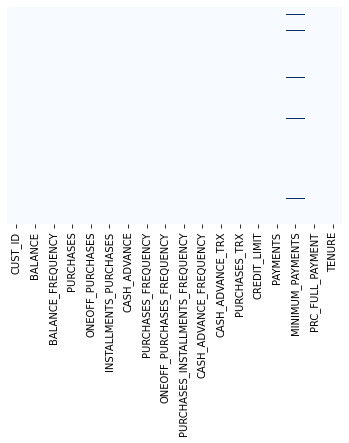

In [9]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")
plt.show()

In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Inferencia estadística

Vamos a rellenar los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT'

In [11]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

Vamos a rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT'

In [12]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

Nuestro dataset ya no tiene valores nulos

In [13]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Clientes duplicados
Verifiquemos si tenemos entradas duplicadas en nuestros datos

In [14]:
creditcard_df.duplicated().sum()

0

### Eliminar "CUST_ID"
Podemos deshacernos del campo Customer ID ya que no nos sirve para nada 

In [15]:
creditcard_df.drop("CUST_ID", axis = 1, inplace=True)

In [16]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Histograms - KDE plots

In [17]:
num_cols = len(creditcard_df.columns)
print(num_cols)

17


In [18]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

- distplot combina la función matplotlib.hist con la de seaborn kdeplot()
- KDE Plot representa la Kernel Density Estimate
- KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
- KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

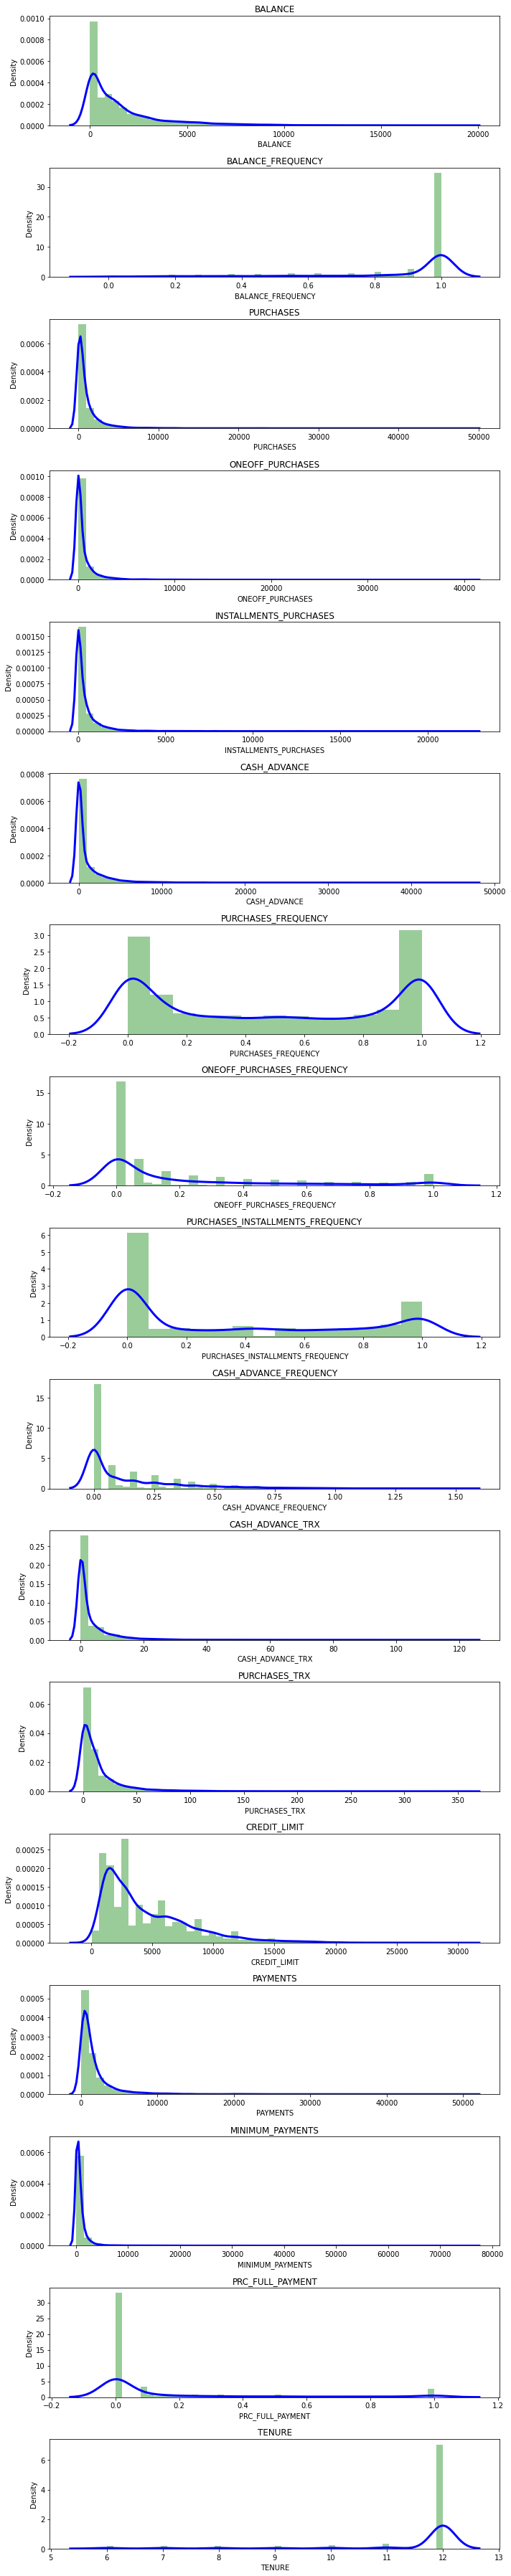

In [19]:
plt.figure(figsize = (10, 50))
for i in range(num_cols):
    plt.subplot(num_cols, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()
plt.show()

- El balance promedio es  $1500
- 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
- Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
- Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
- Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
- El promedio del límite del crédito está entorno de los $4500
- La mayoría de clientes llevan ~11 años usando el servicio

### Correlaciones

In [20]:
correlations = creditcard_df.corr()

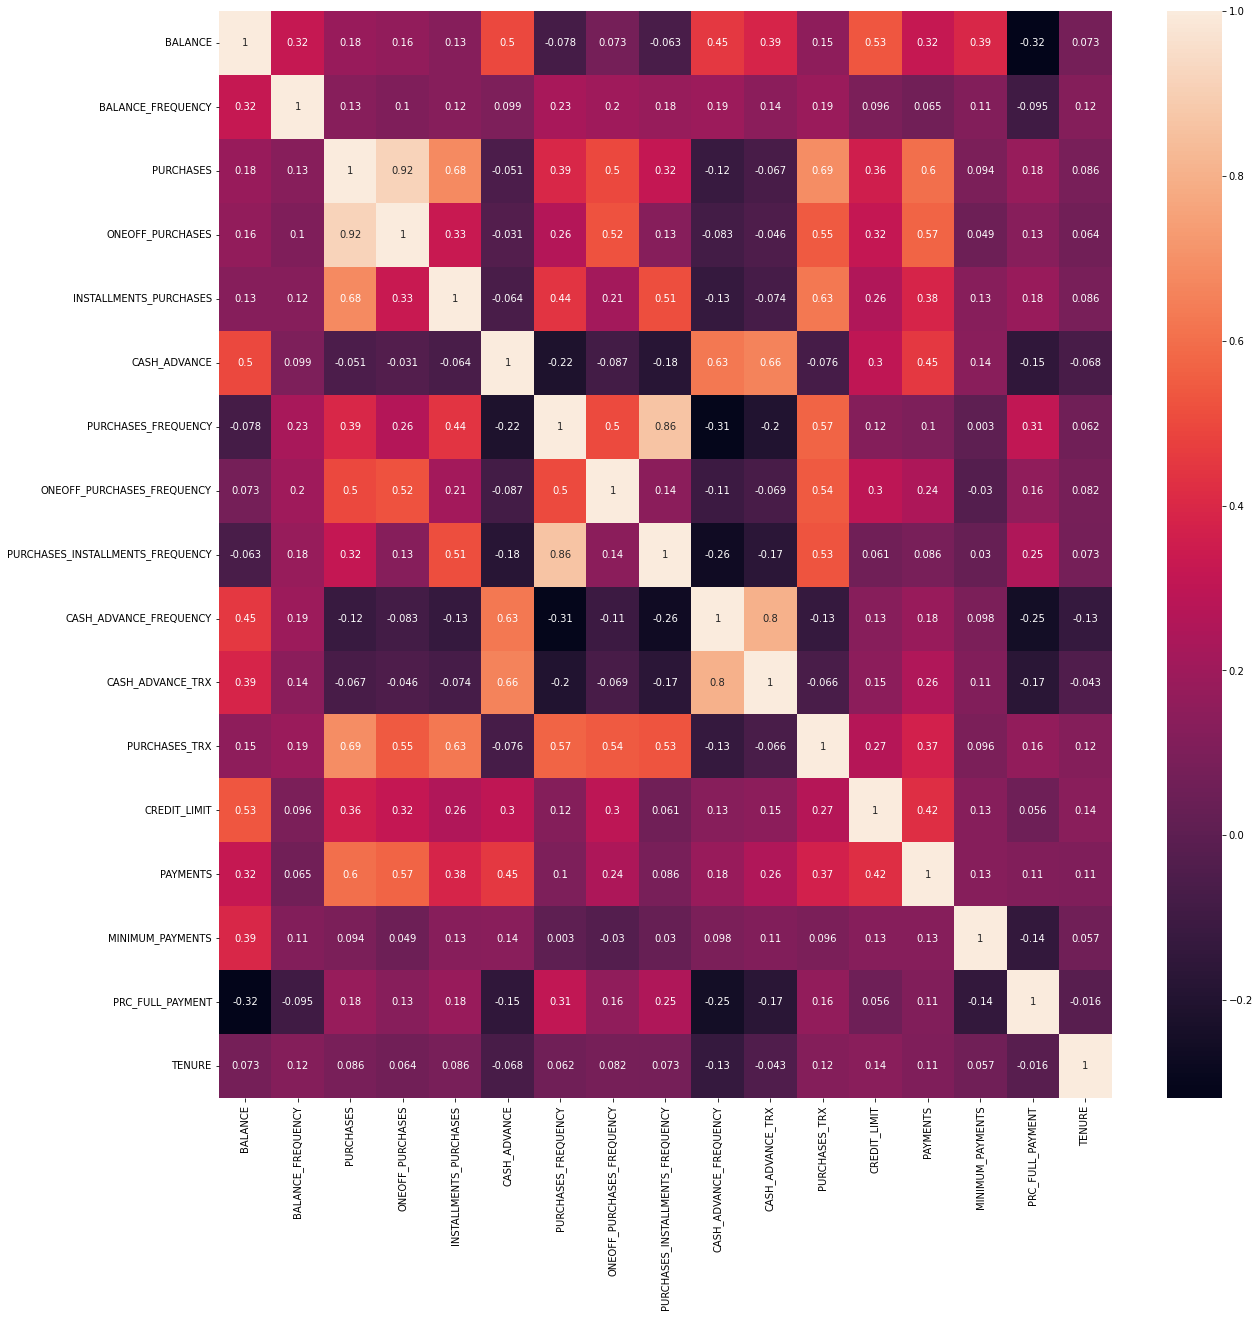

In [21]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)
plt.show()

- Hay correlación entre 'PURCHASES' y ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
- Se ve una tendencia entre 'PURCHASES' y 'CREDIT_LIMIT' & 'PAYMENTS'
- 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments. 
- Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'

## K-Means

- K-means es un algoritmo de aprendizaje no supervisado (clustering)
- K-Means funciona agrupando algunos puntos de datos (clustering) de forma no supervisada
- El algoritmo agrupa las observaciones con valores de atributos similares al medir la distancia euclidiana entre puntos.

### ENCONTRAR EL NÚMERO ÓPTIMO DE CLISTERS UTILIZANDO EL MÉTODO DEL CODO

- El método del codo es un método heurístico de interpretación y validación de la coherencia dentro del análisis de clustering diseñado para ayudar a encontrar el número apropiado de clusters en un conjunto de datos.
- Si el gráfico de líneas se parece a un brazo, entonces el "codo" en el brazo es el valor de k que es el mejor.
- Source:
    - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
    - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/


### Escalar variables

In [22]:
from sklearn.preprocessing import StandardScaler, normalize

In [23]:
scaler = StandardScaler()

In [24]:
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
creditcard_df_scaled.shape

(8950, 17)

In [26]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### WCSS

In [27]:
from sklearn.cluster import KMeans

In [77]:
scores_wcss = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_wcss.append(kmeans.inertia_) #WCSS

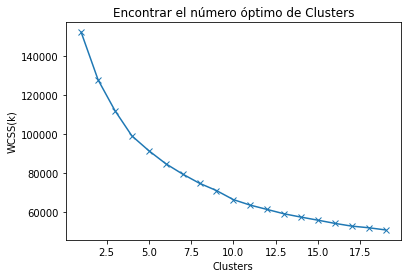

In [78]:
plt.plot(range_values, scores_wcss, 'x-', color='#1F78B4')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

- Con el gráfico podemos ver que en 4 clusters es donde se forma el codo de la curva.
- Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster. 
- Elijamos pues un número de clusters igual a 8.

### Aplicar K-Means con K=8

In [29]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [30]:
labels

array([0, 6, 7, ..., 4, 4, 4], dtype=int32)

In [31]:
kmeans.cluster_centers_.shape

(8, 17)

In [32]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.026738,0.404416,-0.361606,-0.246730,-0.401613,-0.081208,-0.867232,-0.409915,-0.759077,0.122071,-0.016041,-0.486612,-0.297882,-0.245601,-0.002453,-0.456232,0.271579
1,0.935822,0.467293,2.246268,1.697962,2.191837,-0.192754,1.161273,1.538110,1.258858,-0.309830,-0.208589,2.789559,1.227251,1.275606,0.618524,0.269496,0.333865
2,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
3,-0.366866,0.333522,-0.040371,-0.244530,0.353604,-0.365041,0.987645,-0.387211,1.202973,-0.476378,-0.362186,0.185357,-0.259172,-0.218685,-0.055610,0.312466,0.257586
4,-0.336717,-0.351618,-0.289556,-0.216192,-0.287105,0.068131,-0.204713,-0.289287,-0.225660,0.308086,0.000466,-0.388444,-0.566467,-0.392990,-0.208809,0.013145,-3.202809


Para entender mejor estos valores, vamos a aplicar la transformación inversa.

In [33]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1620.126719,0.973073,230.628603,182.915296,47.894316,808.574508,0.142288,0.080172,0.062761,0.159572,3.139356,2.614484,3410.631553,1022.152535,858.489531,0.020275,11.880761
1,3512.308678,0.987968,5802.390885,3410.707273,2393.119019,574.657438,0.956426,0.661306,0.864740,0.073144,1.825359,84.047847,8959.688995,5425.897404,2305.650693,0.232538,11.964115
2,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
3,800.874133,0.956279,916.952045,186.567618,730.827742,213.362613,0.886740,0.086945,0.842529,0.039816,0.777171,19.317122,3551.474046,1100.071010,734.609325,0.245106,11.862035
4,863.627544,0.793976,384.563451,233.602408,151.442584,1121.745122,0.408189,0.116158,0.274754,0.196795,3.252006,5.054575,2433.410031,595.475430,377.585275,0.157559,7.231140
5,104.939796,0.370465,339.104814,201.448528,137.907386,302.527006,0.267430,0.070296,0.189639,0.030760,0.680203,4.282572,3846.818481,1147.508187,265.114438,0.235741,11.787648
6,5116.217747,0.970154,545.520604,337.325118,208.315948,5283.769393,0.301107,0.140029,0.202098,0.523520,16.682464,8.197867,8281.344248,4165.938478,2080.827616,0.039555,11.606635
7,1216.971025,0.970339,2015.874493,1618.351024,397.523469,279.366342,0.870650,0.764790,0.400761,0.053582,1.037138,27.970109,5869.363472,2023.233532,484.118852,0.275983,11.868659


- Primer Cluster de Clientes (Transactors): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo (\$104) y anticipo en efectivo (\$303), Porcentaje de pago completo = 23%
- Segundo Cluster de Clientes (Revolvers) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto (\$ 5000) y anticipo en efectivo (~ \$ 5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
- Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto \$ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
- Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo

In [34]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
print(y_kmeans)

[1 3 0 ... 6 6 6]


Concatenamos las etiquetas de los clusters con el dataset original

In [36]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


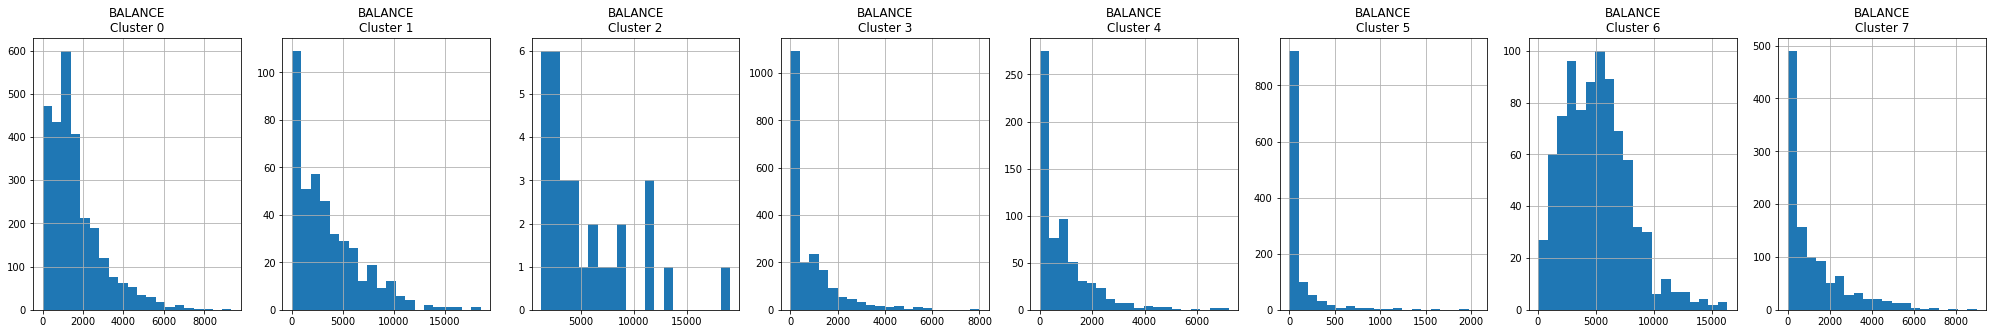

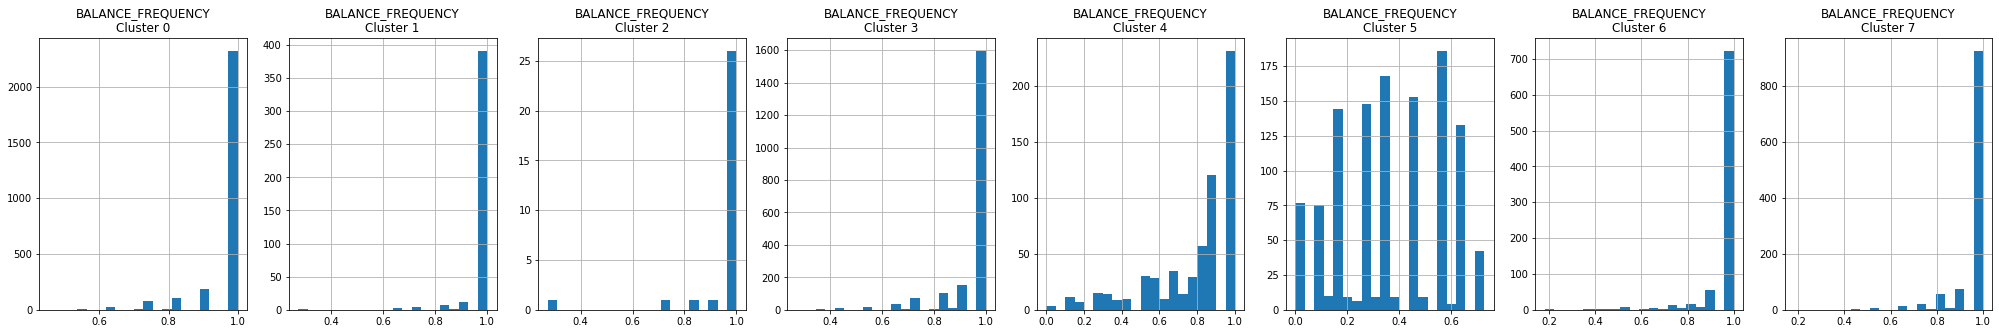

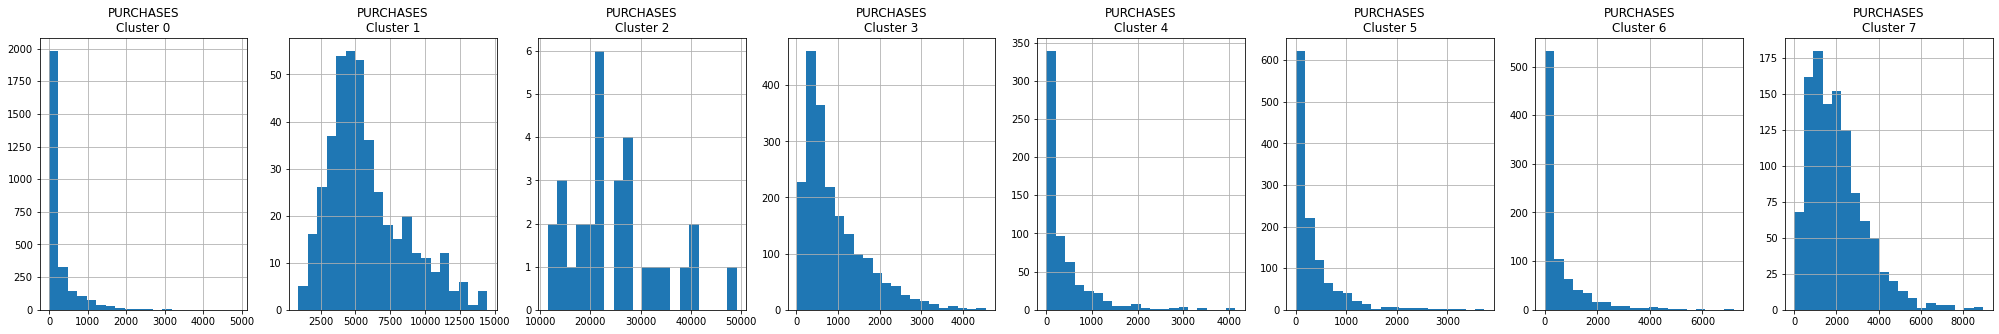

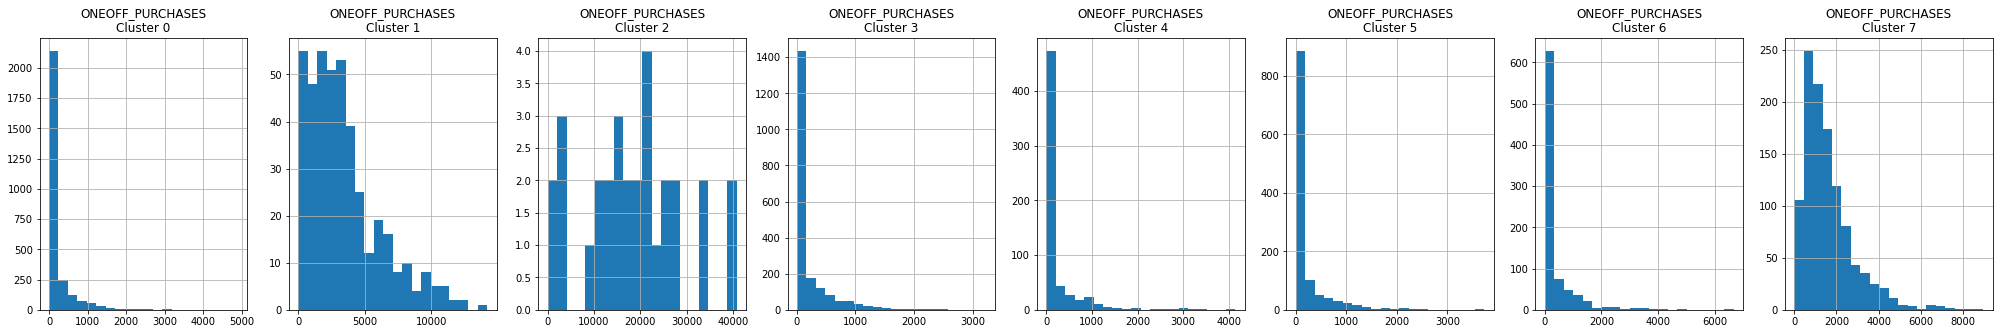

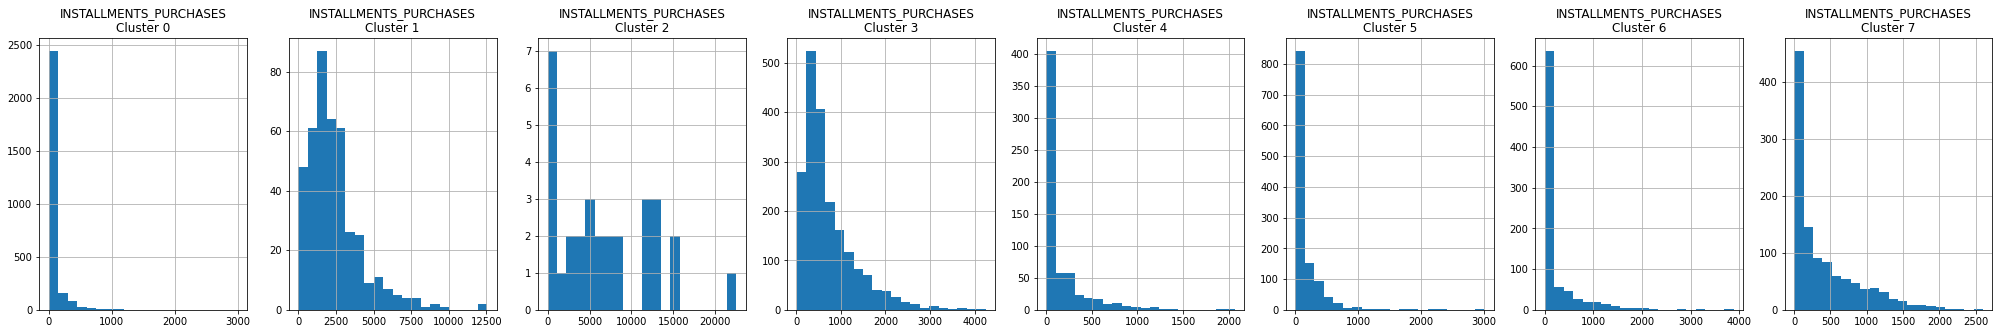

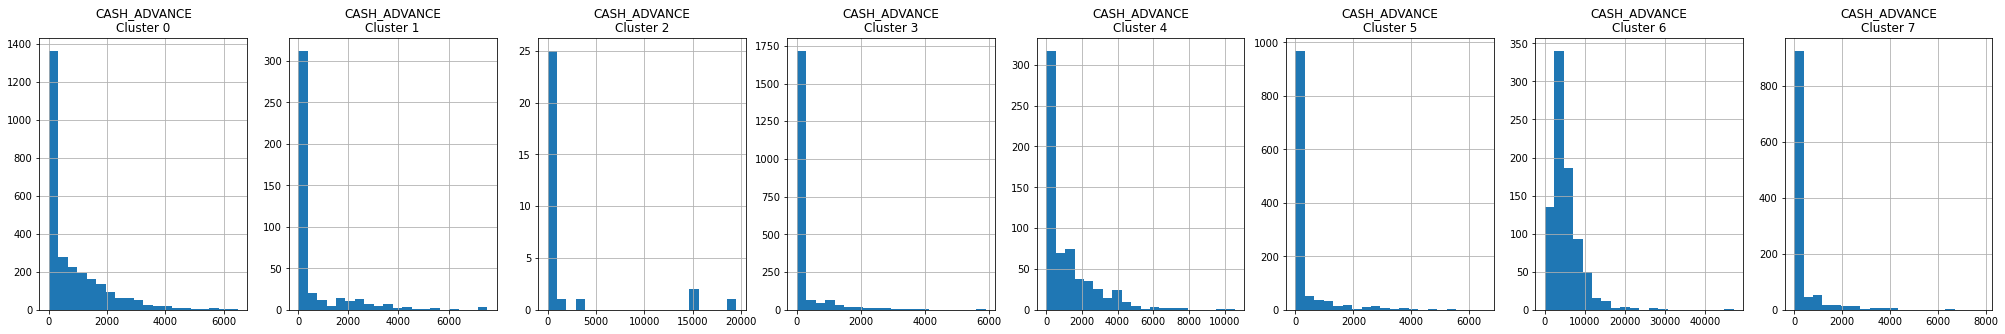

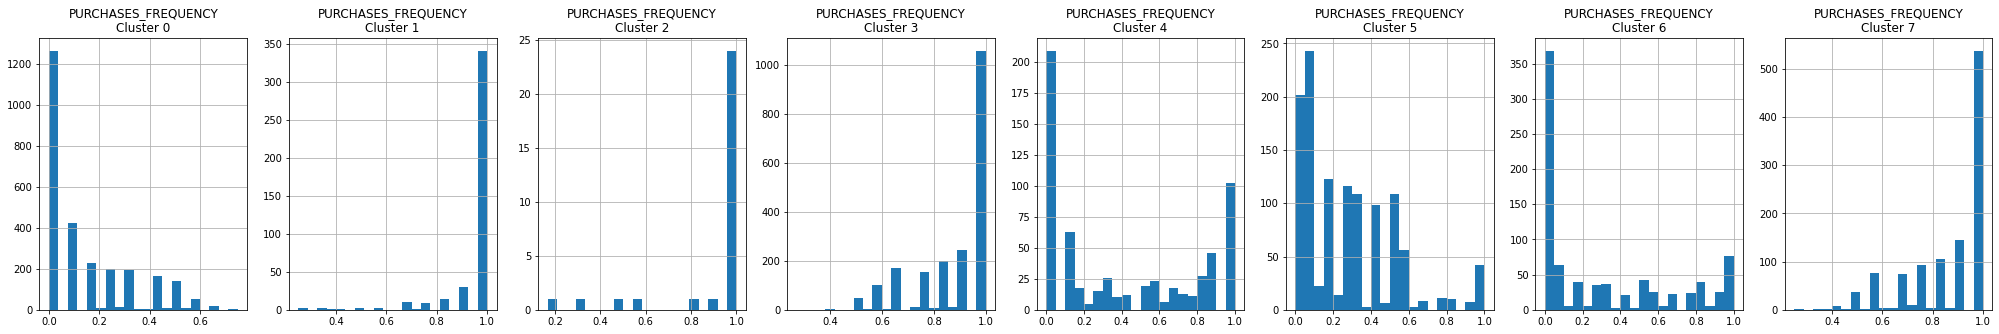

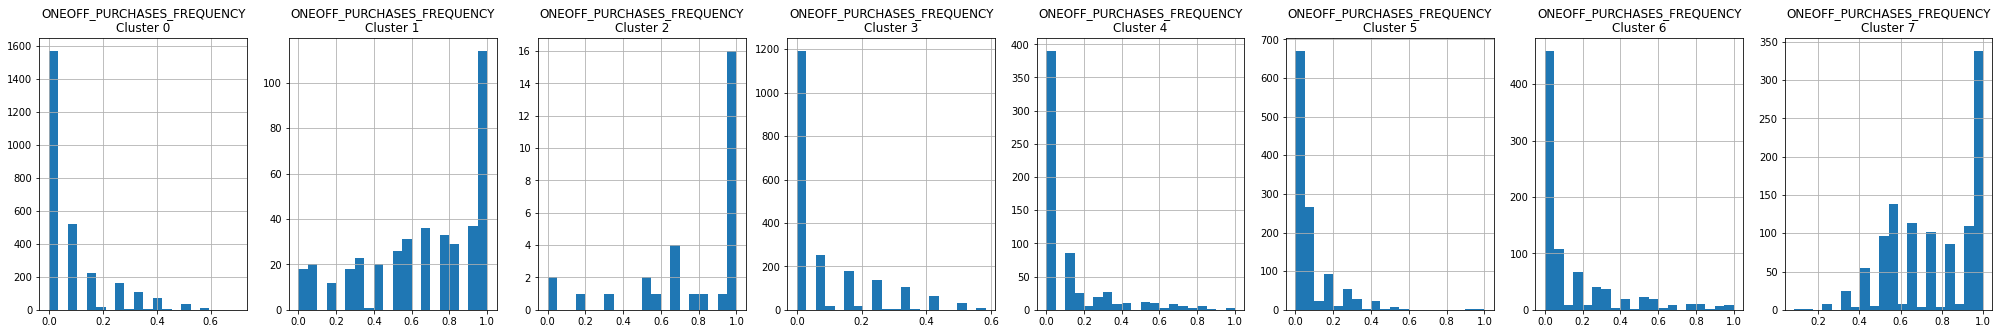

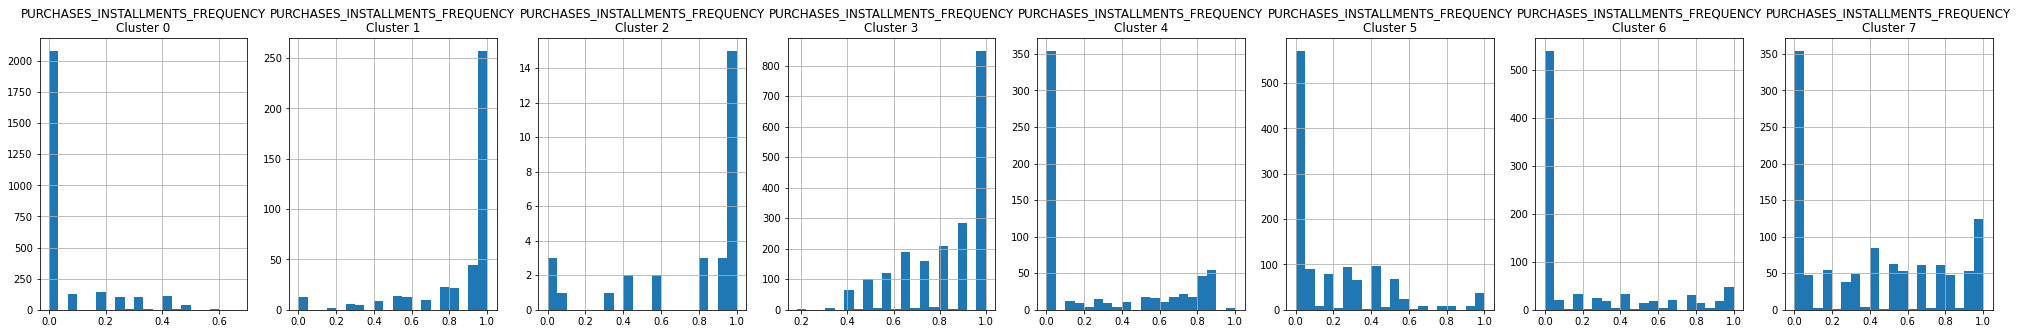

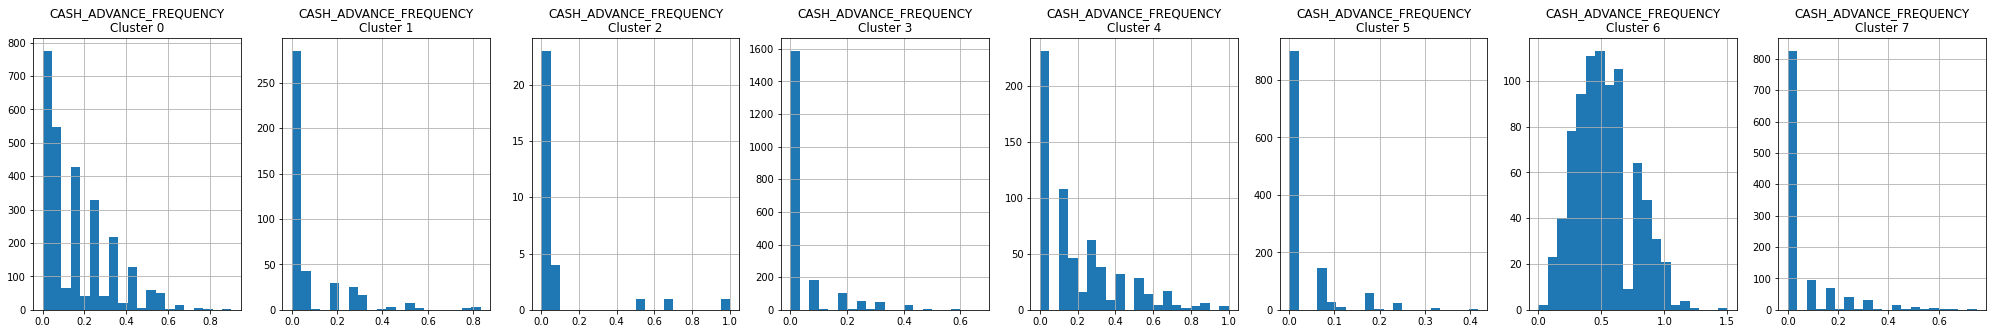

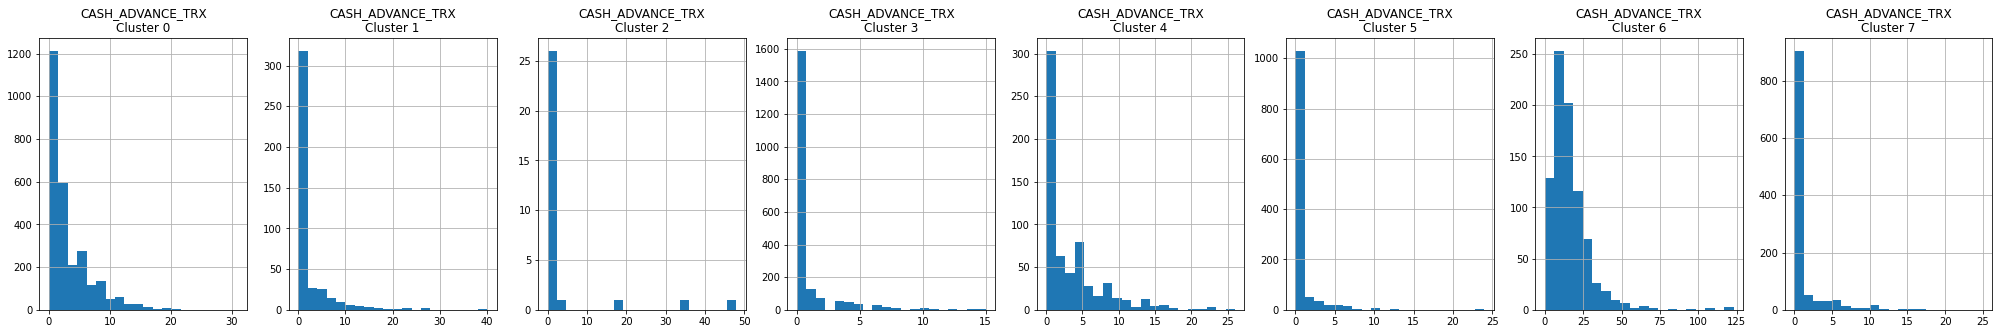

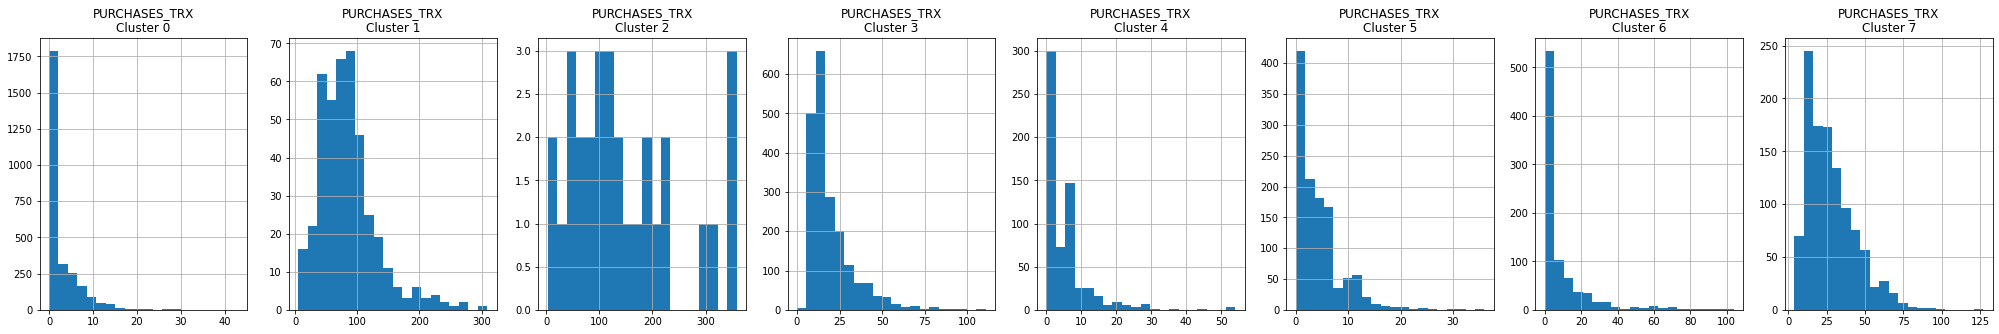

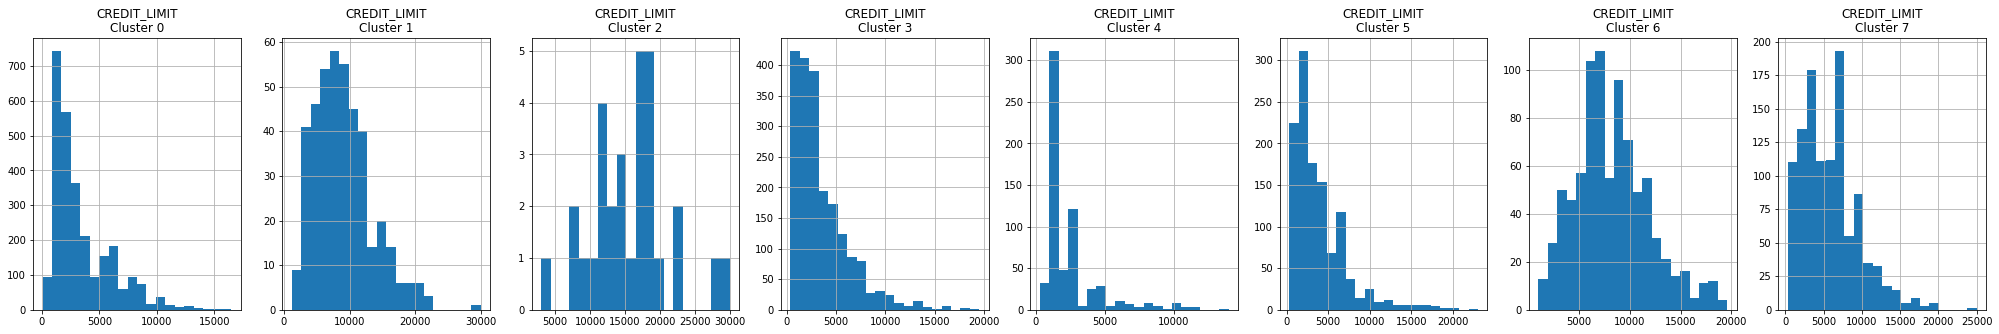

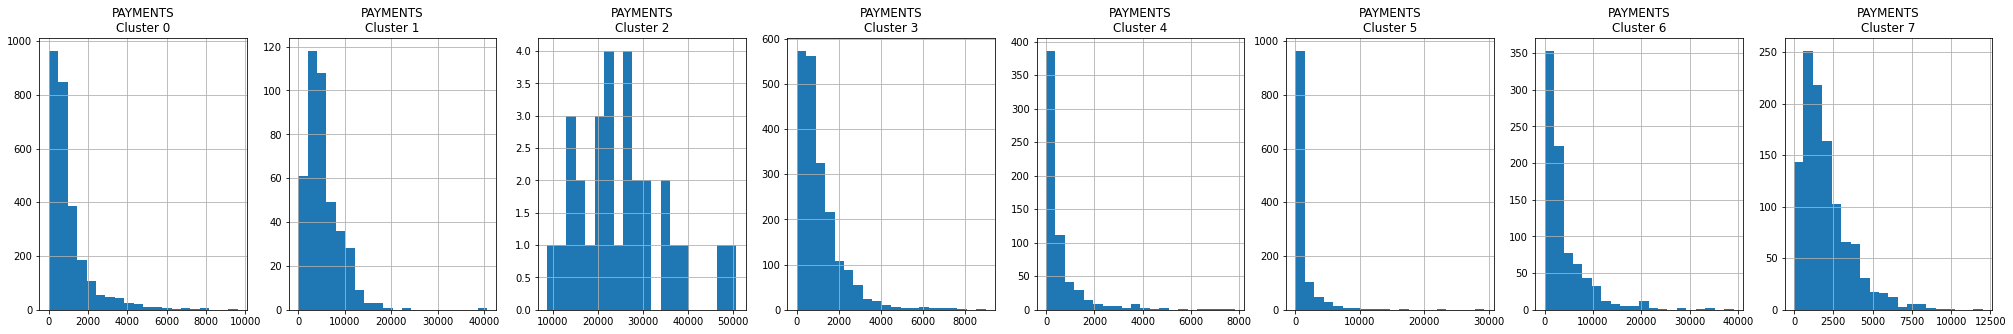

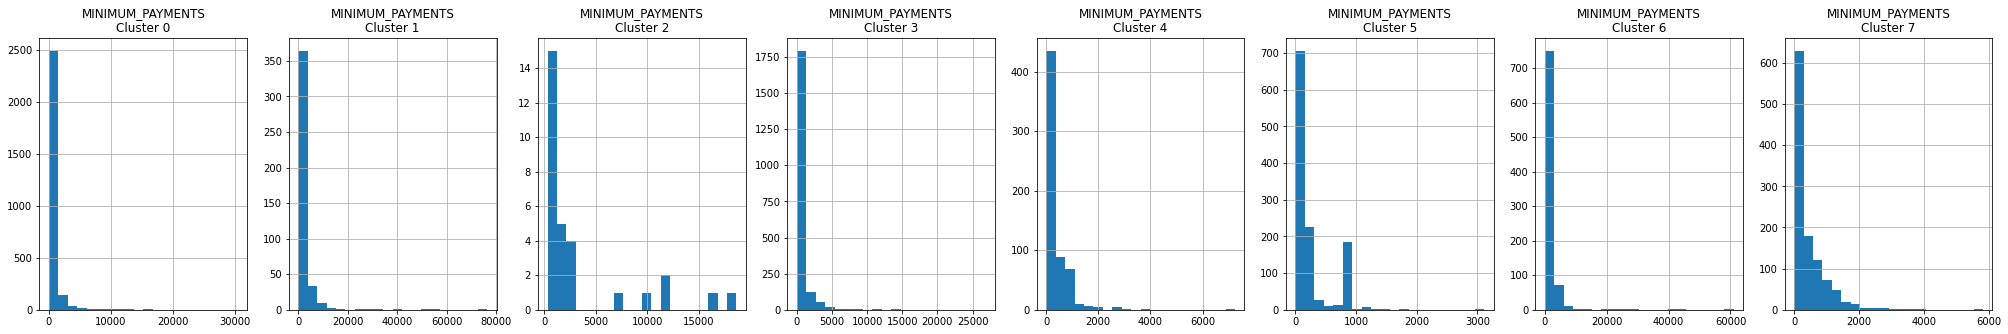

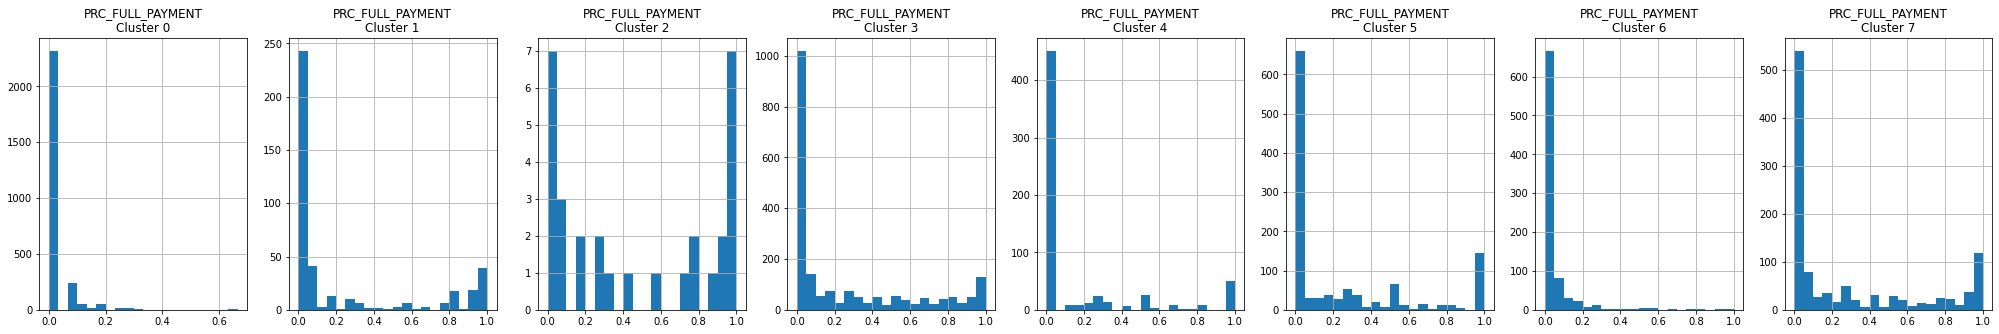

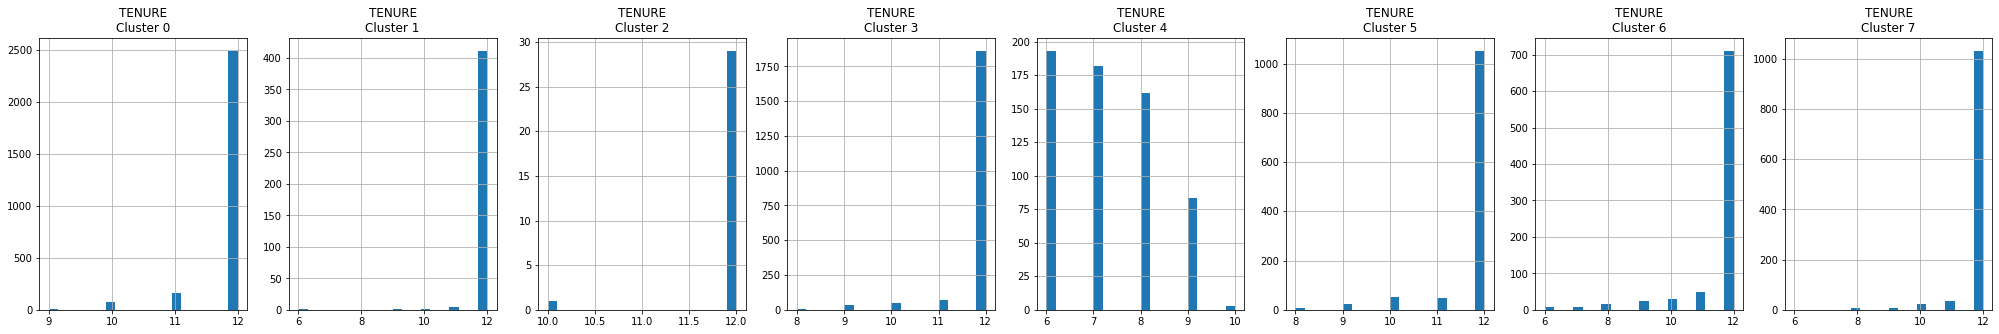

In [38]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}\nCluster {}'.format(i, j))
    plt.show()

## Principal components analysis (PCA)

- PCA es un algoritmo de aprendizaje automático no supervisado.
- PCA realiza reducciones de dimensionalidad mientras intenta mantener la información original sin cambios.


In [35]:
from sklearn.decomposition import PCA

Obtenemos las componentes principales

In [39]:
pca = PCA(n_components=2)

In [40]:
principal_comp = pca.fit_transform(creditcard_df_scaled)

In [41]:
principal_comp

array([[-1.68222078, -1.07644589],
       [-1.13829571,  2.5064957 ],
       [ 0.96968536, -0.38353259],
       ...,
       [-0.92620403, -1.81078776],
       [-2.33655226, -0.65796648],
       [-0.55642098, -0.40047763]])

Creamos un dataframe con las dos componentes 

In [42]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca_1', 'pca_2'])
pca_df.head()

,pca_1,pca_2
0,-1.682221,-1.076446
1,-1.138296,2.506496
2,0.969685,-0.383533
3,-0.873628,0.043175
4,-1.599434,-0.688579


Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales

In [43]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca_1,pca_2,cluster
0,-1.682221,-1.076446,0
1,-1.138296,2.506496,6
2,0.969685,-0.383533,7
3,-0.873628,0.043175,0
4,-1.599434,-0.688579,0


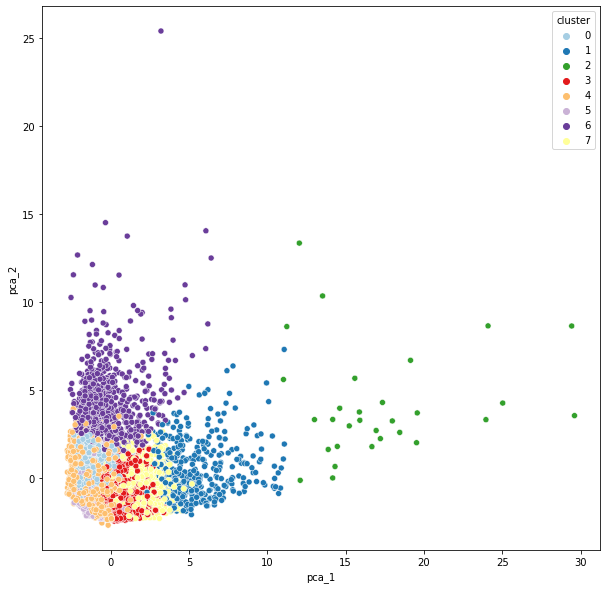

In [49]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca_1", y = "pca_2", hue = "cluster", data = pca_df,
                     palette = ['#A6CEE3', '#1F78B4', '#33A02C', '#E31A1C', '#FDBF6F', '#CAB2D6', '#6A3D9A', '#FFFF99'])
plt.show()

## Reducción de dimensión con Auto Encoders

- Los autoencoders son un tipo de redes artificiales que se utilizan para realizar una tarea de codificación de datos (representation learning).
    - https://en.wikipedia.org/wiki/Autoencoder

### Importando librerías

In [53]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

### Arquitectura AutoEnconder

In [54]:
encoding_dim = 7
input_df = Input(shape=(17, ))

In [56]:
x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

In [57]:
encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

In [58]:
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

In [59]:
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

In [61]:
autoencoder = Model(input_df, decoded)

In [62]:
encoder = Model(input_df, encoded)

In [63]:
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [64]:
creditcard_df_scaled.shape

(8950, 17)

In [65]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_1 (Dense)             (None, 7)                 126       
                                                                 
 dense_2 (Dense)             (None, 500)               4000      
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_5 (Dense)             (None, 10)                20010     
                                                                 
 dense_6 (Dense)             (None, 2000)              22000 

### Entrenamiento Auto Encoder

In [66]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 4s 42ms/step - loss: 0.5354
Epoch 2/25
70/70 [==============================] - 3s 43ms/step - loss: 0.2877
Epoch 3/25
70/70 [==============================] - 3s 44ms/step - loss: 0.2191
Epoch 4/25
70/70 [==============================] - 3s 43ms/step - loss: 0.2011
Epoch 5/25
70/70 [==============================] - 3s 42ms/step - loss: 0.1746
Epoch 6/25
70/70 [==============================] - 3s 42ms/step - loss: 0.1611
Epoch 7/25
70/70 [==============================] - 3s 43ms/step - loss: 0.1319
Epoch 8/25
70/70 [==============================] - 3s 42ms/step - loss: 0.1234
Epoch 9/25
70/70 [==============================] - 3s 42ms/step - loss: 0.1212
Epoch 10/25
70/70 [==============================] - 3s 43ms/step - loss: 0.1146
Epoch 11/25
70/70 [==============================] - 3s 43ms/step - loss: 0.1007
Epoch 12/25
70/70 [==============================] - 3s 43ms/step - loss: 0.1026
Epoch 13/25
70/70 [==================

### Guardar pesos de autoencoder

In [67]:
autoencoder.save_weights('autoencoder.h5')

### Predicción Auto Encoder

In [68]:
pred = encoder.predict(creditcard_df_scaled)

In [69]:
pred.shape

(8950, 10)

In [79]:
scores_wcss_ae = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_wcss_ae.append(kmeans.inertia_)

### WCSS con autoencoders

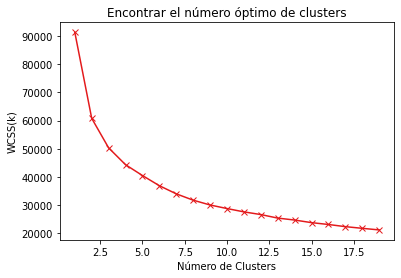

In [80]:
plt.plot(range_values, scores_wcss_ae, 'x-', color='#E31A1C')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

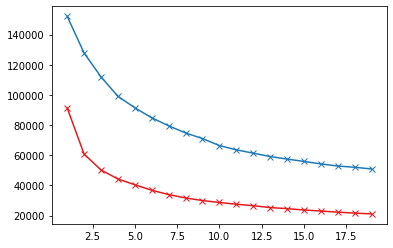

In [81]:
plt.plot(range_values, scores_wcss, 'x-', color = "#1F78B4")
plt.plot(range_values, scores_wcss_ae, 'x-', color = "#E31A1C")
plt.show()

In [82]:
kmeans = KMeans(4)

In [83]:
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [84]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


### PCA

In [85]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca_1", "pca_2"])
pca_df.head()

,pca_1,pca_2
0,-2.551373,-0.160892
1,-0.645985,1.694359
2,1.562857,-0.177392
3,-1.567626,0.321595
4,-2.307108,-0.065279


In [86]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df.head()

,pca_1,pca_2,cluster
0,-2.551373,-0.160892,0
1,-0.645985,1.694359,0
2,1.562857,-0.177392,1
3,-1.567626,0.321595,0
4,-2.307108,-0.065279,0


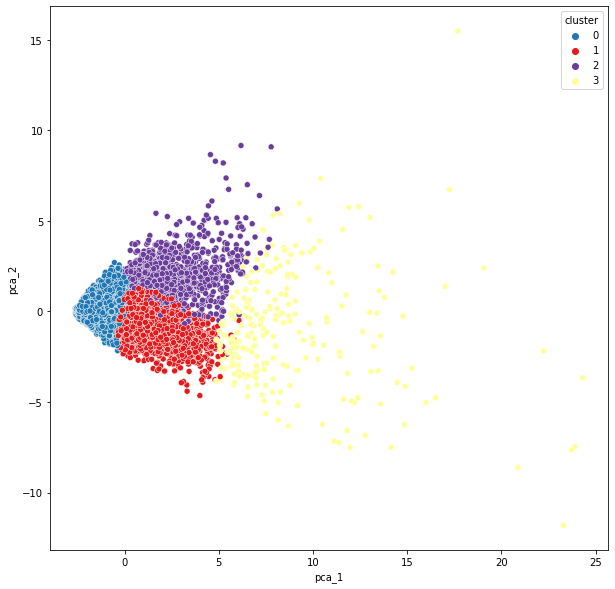

In [87]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca_1", y = "pca_2", hue="cluster", data = pca_df, palette=['#1F78B4', '#E31A1C', '#6A3D9A', '#FFFF99'])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=411b8b93-d907-447c-b9ee-0c6a1d3e8371' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>